In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

import glob

In [2]:
%matplotlib notebook

In [3]:
# meta data
z = 0.0094
tb_max = 58863.34

In [4]:
def plot_box_spec(wave, flux): 
    flux_plot = np.repeat(flux, 2)
    wv_plot = wave.copy()
    wv_plot[:-1] += np.diff(wave)/2
    wv_plot = np.append(wave[0]-(wave[1]-wave[0])/2, 
                        np.append(np.repeat(wv_plot[0:-1], 2), 
                                  wave[-1]+(wave[-1]-wave[-2])/2))
    
    return wv_plot, flux_plot

In [5]:
spec_files = glob.glob('../data/spectra/*ascii')
spec_files.sort()
# spec_files.pop(2)

In [6]:
spec_files

['../data/spectra/ZTF19adcecwu_20191231_LT_v1.ascii',
 '../data/spectra/ZTF19adcecwu_20200103_LT_v1.ascii',
 '../data/spectra/ZTF19adcecwu_20200104_LT_v1.ascii',
 '../data/spectra/ZTF19adcecwu_20200105_LT_v1.ascii',
 '../data/spectra/ZTF19adcecwu_20200106_LT_v1.ascii',
 '../data/spectra/ZTF19adcecwu_20200112_LT_v1.ascii',
 '../data/spectra/ZTF19adcecwu_20200112_P60_v1.ascii',
 '../data/spectra/ZTF19adcecwu_20200115_P60_v1.ascii',
 '../data/spectra/ZTF19adcecwu_20200118_MMT_v1.ascii',
 '../data/spectra/ZTF19adcecwu_20200124_Keck1_v1.ascii',
 '../data/spectra/ZTF19adcecwu_20200125_P60_v1.ascii',
 '../data/spectra/ZTF19adcecwu_20200127_P60_v1.ascii',
 '../data/spectra/ZTF19adcecwu_20200129_NOT_v1.ascii',
 '../data/spectra/ZTF19adcecwu_20200201_P60_v1.ascii',
 '../data/spectra/ZTF19adcecwu_20200208_LT_v1.ascii',
 '../data/spectra/ZTF19adcecwu_20200209_LT_v1.ascii',
 '../data/spectra/ZTF19adcecwu_20200210_LT_v1.ascii',
 '../data/spectra/ZTF19adcecwu_20200213_P60_v1.ascii',
 '../data/spectra

<IPython.core.display.Javascript object>


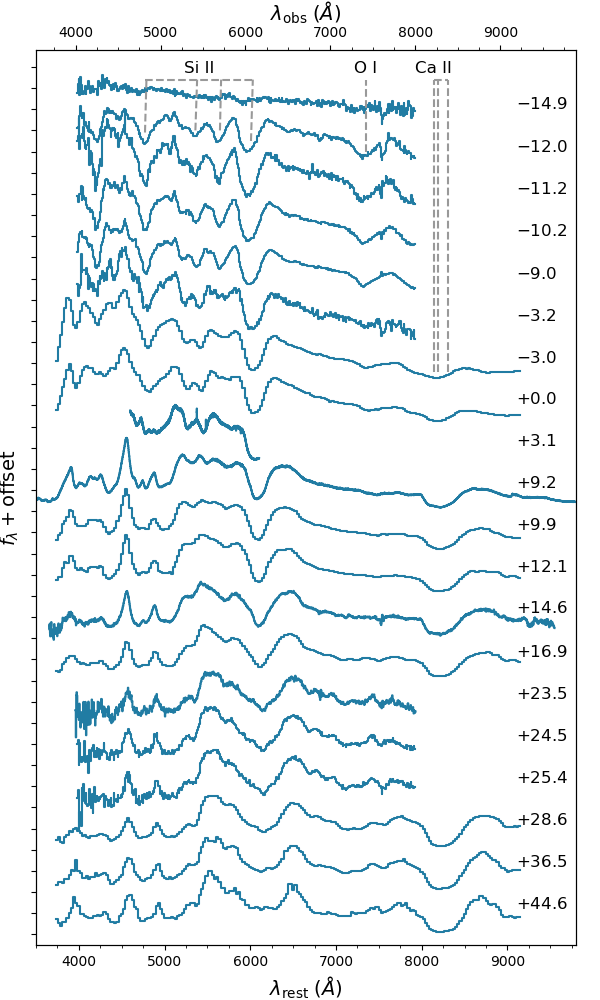

In [12]:
aam_colors = {'mustard': "#E29930",
             'blue': "#217CA3",
             'asphalt': "#32384D",
             'navy': "#444C5C",
             'punch': "#CE5A57",
             'ocean': "#78A5A3",
             'warm': "#E1B16A",}

phase_list = []

fig, ax = plt.subplots(figsize=(6,10))

for spec_num, spec in enumerate(spec_files):
    spec_df = pd.read_csv(spec, comment='#', delim_whitespace=True, header=None)
    
    wv, fl = plot_box_spec(spec_df[0].values, spec_df[1].values)
    
    norm_flux = np.median(fl[np.where((wv > 7200) & (wv < 7400))])
    if not np.isfinite(norm_flux):
        norm_flux = 400
    ax.plot(wv/(1+z), fl/norm_flux - 2*spec_num, color=aam_colors['blue'])
    
    with open(spec) as f:
        ll = f.readlines()
    # brute force
    for l in ll:
        if 'MJD' in l:
            if '=' in l and 'at start' in l:
                mjd_obs = float(l.split('=')[1].split("'")[1])
            elif '=' in l and '/' in l:
                mjd_obs = float(l.split('=')[1].split('/')[0])
            elif '=' in l:
                mjd_obs = float(l.split('=')[1])
            elif ':' in l:
                mjd_obs = float(l.split(':')[1])
            break
    
    phase = (mjd_obs - tb_max)/(1+z)
    phase_list.append(phase)
    if spec_num == 12:
        ax.text(9100, 1.2 - 2*spec_num, r'$+{:.1f}$'.format(np.abs(phase)), fontsize=12)
        
    elif mjd_obs < tb_max:
        ax.text(9100, 1- 2*spec_num, r'$-{:.1f}$'.format(np.abs(phase)), fontsize=12)
    else:
        ax.text(9100, 1- 1.99*spec_num, r'$+{:.1f}$'.format(np.abs(phase)), fontsize=12)
    
ax.set_xlim(3500,9800)
ax.set_ylim(-38.5,3.8)
ax.set_yticklabels([])
ax.set_ylabel(r'$f_\lambda + \mathrm{offset}$', fontsize=14)
ax.set_xlabel(r'$\lambda_\mathrm{rest} \;  (\AA)$', fontsize=14)
ax.xaxis.set_minor_locator(MultipleLocator(250))
ax.yaxis.set_major_locator(MultipleLocator(1))

wv_obs = ax.twiny()
wv_obs.set_xlim(np.array(ax.get_xlim())*(1+z))
wv_obs.set_xlabel(r'$\lambda_\mathrm{obs} \; (\AA)$', fontsize=14)
wv_obs.xaxis.set_minor_locator(MultipleLocator(250))

# plot lines
# Si II 6355
ax.plot([(1+z)*6355*(1-19000/2.9979e5), (1+z)*6355*(1-18000/2.9979e5)], 
        [-0.5,2.4], '--', color='0.6')
# Si II 5972
ax.plot([(1+z)*5972*(1-19000/2.9979e5), (1+z)*5965*(1-18000/2.9979e5)], 
        [0,2.4], '--', color='0.6')
# Si II 5669
ax.plot([(1+z)*5669*(1-19000/2.9979e5), (1+z)*5670*(1-18000/2.9979e5)], 
        [0,2.4], '--', color='0.6')
# Si II 5047
ax.plot([(1+z)*5047*(1-19000/2.9979e5), (1+z)*5047*(1-18000/2.9979e5)], 
        [-0.1,2.4], '--', color='0.6')
ax.plot([(1+z)*5047*(1-19000/2.9979e5), (1+z)*6355*(1-18000/2.9979e5)], 
        [2.4,2.4], '--', color='0.6')
ax.text(5406.2856, 2.7, 
        r'Si II', ha='center', fontsize=12)

# O I 7774
ax.plot([(1+z)*7774*(1-19000/2.9979e5), (1+z)*7774*(1-19000/2.9979e5)], 
        [-1.,2.4], '--', color='0.6')
ax.text((1+z)*7774*(1-19000/2.9979e5), 2.7, 
        r'O I', ha='center', fontsize=12)

# Ca II 8498
ax.plot([(1+z)*8498*(1-15000/2.9979e5), (1+z)*8498*(1-15000/2.9979e5)], 
        [-11.4,2.4], '--', color='0.6')
# Ca II 8542
ax.plot([(1+z)*8542*(1-15000/2.9979e5), (1+z)*8542*(1-15000/2.9979e5)], 
        [-11.4,2.4], '--', color='0.6')
# Ca II 8662
ax.plot([(1+z)*8662*(1-15000/2.9979e5), (1+z)*8662*(1-15000/2.9979e5)], 
        [-11.4,2.4], '--', color='0.6')
ax.plot([(1+z)*8498*(1-15000/2.9979e5), (1+z)*8662*(1-15000/2.9979e5)], 
        [2.4,2.4], '--', color='0.6')
ax.text(8136.5, 2.7, 
        r'Ca II', ha='center', fontsize=12)


fig.subplots_adjust(left=0.06,bottom=0.055,top=0.95,right=0.96)
fig.savefig('../paper/figures/spec_evo.pdf')

In [13]:
with open('../playground/spec_phase.txt', 'w') as fw:
    print('specname phase', file=fw)
    for sfile, p in zip(spec_files, phase_list):
        print(sfile.split('/')[-1], p, file=fw)